# Data Preparation and initial experimentation

## Prerequisites and imports

In [1]:
import pandas as pd
from ordered_set import OrderedSet
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
import ast

## Import CSV files from min pathways and create general data set

In [2]:
# specifying the path to csv files
path = '/Users/philine/SynologyDrive/Projects/Plastics/Data/CSV_min'

In [3]:
# csv files in the path
files = glob.glob(path + "/*.csv")
  
# defining an empty list to store content
data = pd.DataFrame()
content = []
  
# checking all the csv files in the specified path 
for filename in files:
    
    # reading content of csv file
    df = pd.read_csv(filename, index_col=None)
    content.append(df)
  
 # converting content to data frame
data = pd.concat(content)

data

,ID,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,REACTIONS,LENGTH SC.,KEGG SC.,GRAPH
0,1,5,C11505 => C02001 => C01471 => C05608 => C06561...,Propene => 2-Propen-1-ol => Propenal => p-Coum...,"rat21804, rat10619, rat19578, rat19683, rat132191",0.2,0,Graph
1,2,5,C11505 => C02001 => C05855 => C01600 => C04608...,Propene => 2-Propen-1-ol => 4-Hydroxycinnamyl ...,"rat21804, rat19601, rat45105, rat45020, rat142952",0.2,0,Graph
2,3,5,C11505 => C02001 => C05855 => C00842 => C01460...,Propene => 2-Propen-1-ol => 4-Hydroxycinnamyl ...,"rat21804, rat19601, rat44607, rat44474, rat142943",0.2,0,Graph
3,4,5,C11505 => C02001 => C05855 => C00842 => C01714...,Propene => 2-Propen-1-ol => 4-Hydroxycinnamyl ...,"rat21804, rat19601, rat44607, rat44476, rat142945",0.2,0,Graph
4,5,5,C11505 => C02001 => C05855 => C00842 => C04608...,Propene => 2-Propen-1-ol => 4-Hydroxycinnamyl ...,"rat21804, rat19601, rat44607, rat44572, rat142952",0.2,0,Graph
...,...,...,...,...,...,...,...,...
19,20,5,C06547 => C00511 => C04415 => C00498 => C04608...,Ethylene => Acrylate => 4-O-beta-D-Glucosyl-4-...,"rat131441, rat19475, rat42928, rat42942, rat14...",0.2,0,Graph
20,21,5,C06547 => C00511 => C04415 => C00498 => C01714...,Ethylene => Acrylate => 4-O-beta-D-Glucosyl-4-...,"rat131441, rat19475, rat42928, rat42868, rat14...",0.2,0,Graph
21,22,5,C06547 => C00511 => C04415 => C04507 => C04608...,Ethylene => Acrylate => 4-O-beta-D-Glucosyl-4-...,"rat131441, rat19475, rat45380, rat45600, rat14...",0.2,0,Graph
0,1,5,C11505 => C02001 => C01471 => C10945 => C15525...,Propene => 2-Propen-1-ol => Propenal => Caffey...,"rat21804, rat10619, rat18116, rat18526, rat132271",0.2,0,Graph


## Data pre-processing

### Reset index

In [4]:
# Reset index,messed up from concatenation.
data.reset_index(drop = True, inplace=True)

### Delete unnecessary columns

In [5]:
data = data.drop(['ID', 'KEGG SC.', 'GRAPH'], axis=1)

### Transform data from string to lists to improve accessibility and workability

In [6]:
data['INTERMEDIATES KEGG'] = data['INTERMEDIATES KEGG'].str.split(' => ')
data['INTERMEDIATE NAMES'] = data['INTERMEDIATE NAMES'].str.split(' => ')
data['REACTIONS'] = data['REACTIONS'].str.split(', ')

# load csv

In [7]:
csv = pd.read_csv('CSV.csv')
csv['INTERMEDIATES KEGG'] = csv['INTERMEDIATES KEGG'].apply(lambda x: ast.literal_eval(x))
csv['INTERMEDIATE NAMES'] = csv['INTERMEDIATE NAMES'].apply(lambda x: ast.literal_eval(x))
csv

,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,REACTIONS,LENGTH SC.
0,5,"[C11505, C02001, C01471, C05608, C06561, C00509]","[Propene, 2-Propen-1-ol, Propenal, p-Coumarald...","['rat21804', 'rat10619', 'rat19578', 'rat19683...",0.2
1,5,"[C11505, C02001, C05855, C01600, C04608, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...","['rat21804', 'rat19601', 'rat45105', 'rat45020...",0.2
2,5,"[C11505, C02001, C05855, C00842, C01460, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...","['rat21804', 'rat19601', 'rat44607', 'rat44474...",0.2
3,5,"[C11505, C02001, C05855, C00842, C01714, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...","['rat21804', 'rat19601', 'rat44607', 'rat44476...",0.2
4,5,"[C11505, C02001, C05855, C00842, C04608, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...","['rat21804', 'rat19601', 'rat44607', 'rat44572...",0.2
...,...,...,...,...,...
1722,5,"[C06547, C00511, C04415, C00498, C04608, C01477]","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...","['rat131441', 'rat19475', 'rat42928', 'rat4294...",0.2
1723,5,"[C06547, C00511, C04415, C00498, C01714, C01477]","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...","['rat131441', 'rat19475', 'rat42928', 'rat4286...",0.2
1724,5,"[C06547, C00511, C04415, C04507, C04608, C01477]","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...","['rat131441', 'rat19475', 'rat45380', 'rat4560...",0.2
1725,5,"[C11505, C02001, C01471, C10945, C15525, C05631]","[Propene, 2-Propen-1-ol, Propenal, Caffeyl ald...","['rat21804', 'rat10619', 'rat18116', 'rat18526...",0.2


# Jaccard distance function

In [8]:
def jaccard_distance(A, B):
    #Find symmetric difference of two sets
    nominator = A.symmetric_difference(B)

    #Find union of two sets
    denominator = A.union(B)

    #Take the ratio of sizes
    distance = len(nominator)/len(denominator)
    
    return distance

# get all plastics

In [9]:
plastics = []

for i in csv['INTERMEDIATE NAMES']:
    if i[0] not in plastics:
        plastics.append(i[0])
    else:
        continue

plastics

['Propene', 'Vinyl chloride', 'Ethylene', 'Styrene', 'Terephthalate']

# Functions plastic to get sets

In [10]:
def jd_plastic_sets(data, plastic):
    
    plastic_df = data[data['INTERMEDIATE NAMES'].str[0] == plastic]
    
    
    products = []

    for i in plastic_df['INTERMEDIATE NAMES']:
        if i[-1] not in products:
            products.append(i[-1])
        else:
            continue

    
    ordered_sets = {}

    # Iterate over the names and create ordered sets for each name
    #for name in propene_names:
    for product in products:
        temp = []

        for index, row in plastic_df.iterrows():
            if row['INTERMEDIATE NAMES'][-1] == product:
                temp.extend(row['INTERMEDIATES KEGG'])

        ordered_set = OrderedSet(temp)
        del temp

        product = product.replace(' ', '_')
        product = product.replace('-', '_')
        
        plastic = plastic.replace(' ', '_')
        
        name = plastic + "_" + product

        # Add the ordered set to the dictionary with the corresponding name and product as the keys
        ordered_sets[name] = ordered_set

    # Create Variables containing Ordered Sets
    for key, value in ordered_sets.items():
        globals()[key] = value
        
    return ordered_sets

In [11]:
def jd_plastic_target(ordered_sets):
    
    set_names = []
    sets = []

    for key, value in ordered_sets.items():
        set_names.append(key)
        sets.append(value)
        
    
    jd_dict = {}

    for pair in combinations(sets, 2):
        var1 = pair[0]
        var2 = pair[1]
        key1 = [k for k, v in ordered_sets.items() if v == var1]
        key2 = [k for k, v in ordered_sets.items() if v == var2]
        key1 = ''.join(key1)
        key2 = ''.join(key2)

        # Call your Jaccard_distance() function with var1 and var2 as arguments here
        # For example:
        distance = jaccard_distance(var1, var2)
        jd_dict[key1+'_'+key2] = distance
        
    
    return jd_dict

# FUNCTION target 

# Function distance matrix and heatmap

In [14]:
def dist_matrix(ordered_sets):
    
    n = len(ordered_sets)
    
    if n < 2:
        return None
    
    else:    
        distances = np.zeros((n, n))

        # Calculate the distance between all pairs of sets
        keys = list(ordered_sets.keys())
        for i in range(n):
            for j in range(i+1, n):
                s1, s2 = ordered_sets[keys[i]], ordered_sets[keys[j]]
                distance = jaccard_distance(s1, s2)
                distances[i, j] = distance
                distances[j, i] = distance

        # Print the distance matrix
        return distances

In [42]:
def dist_heatmap(distances, ordered_sets):
    
    if type(distances) == np.ndarray:
        plt.figure(figsize=(15, 12))  
        sns.set(font_scale=0.8)  
        cmap = sns.color_palette("Greens", n_colors = 30, as_cmap=True)  

        # Create a heatmap with customized annotations
        ax = sns.heatmap(
            distances,
            annot=True,
            fmt=".2f",  # Format the annotations
            xticklabels=list(ordered_sets.keys()),
            yticklabels=list(ordered_sets.keys()),
            cmap=cmap,
            annot_kws={"size": 8}  
        )

        # Rotate the xticklabels for better readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
        plt.show()
        
    else:
        return f"The target compound: {ordered_sets.keys()} doesn't have enough pathways available to calculate the Jaccard Distance."

# Propene

In [15]:
# Get sets
propene_sets = jd_plastic_sets(csv, 'Propene')

In [17]:
# Get dictionary containing jaccard distances
propene_dict = jd_plastic_target(propene_sets)

## distance matrix and heatmap

In [18]:
dist_propene = dist_matrix(propene_sets)
dist_propene

array([[0.        , 0.86046512, 0.96153846, 0.95      , 0.85714286,
        0.97142857, 0.97297297, 0.60714286, 0.38461538, 0.90625   ,
        0.96551724, 0.97297297, 0.98039216, 0.97058824, 0.92307692,
        0.69047619, 0.44      , 0.96666667, 0.89285714],
       [0.86046512, 0.        , 0.96296296, 0.83783784, 0.9       ,
        0.97222222, 0.88571429, 0.88888889, 0.85714286, 0.875     ,
        0.89285714, 0.91666667, 0.91836735, 0.94117647, 0.92592593,
        0.85714286, 0.88888889, 0.89655172, 0.93333333],
       [0.96153846, 0.96296296, 0.        , 0.95      , 0.9       ,
        0.92857143, 0.86666667, 0.94117647, 0.95      , 0.83333333,
        0.875     , 0.9375    , 0.93103448, 0.83333333, 0.83333333,
        0.9375    , 0.94117647, 0.88888889, 0.88888889],
       [0.95      , 0.83783784, 0.95      , 0.        , 0.91666667,
        0.92857143, 0.81481481, 0.93548387, 0.90384615, 0.79166667,
        0.8       , 0.89655172, 0.87804878, 0.92592593, 0.95238095,
        0.911

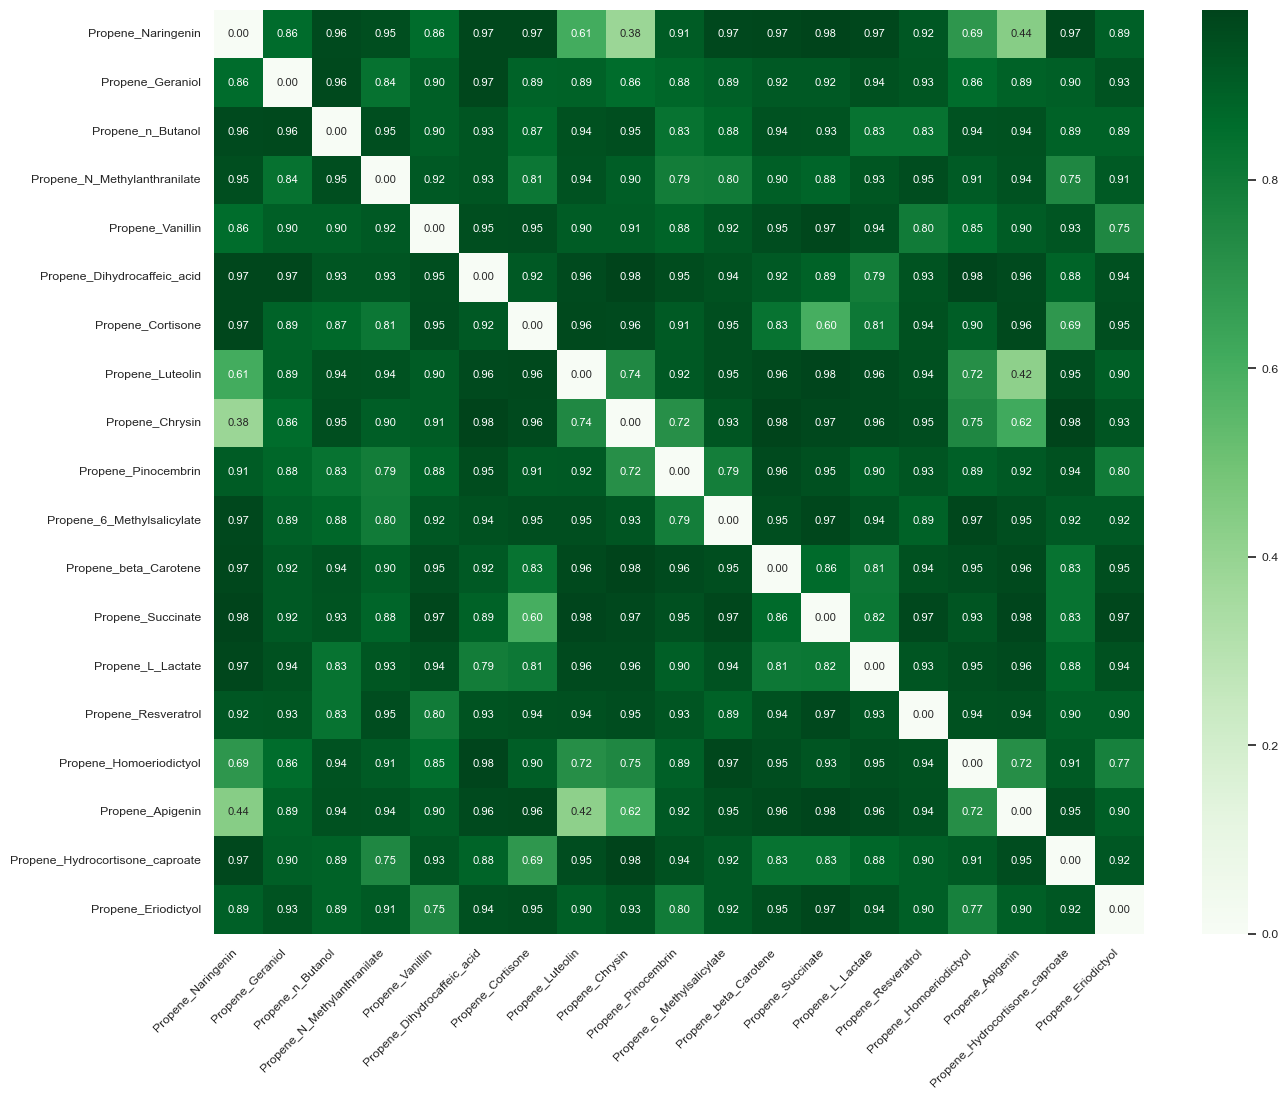

In [20]:
dist_heatmap(dist_propene, propene_sets)

## dendrogram

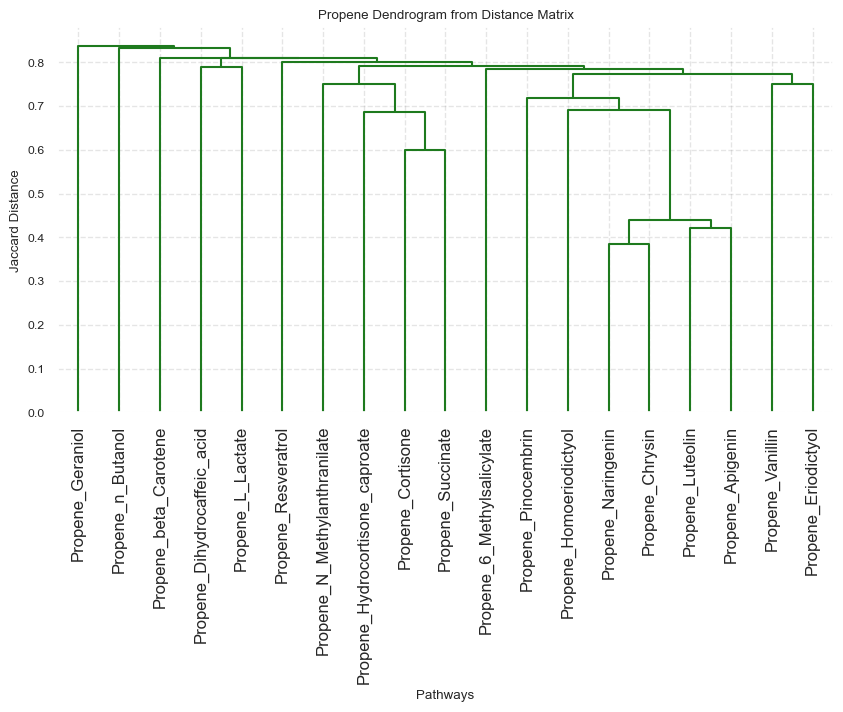

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
from scipy.spatial.distance import squareform

# get matrix
distance_matrix = dist_propene

# Convert the distance matrix to a condensed format
condensed_distance_matrix = squareform(distance_matrix)

# Perform hierarchical clustering on the condensed distance matrix
linked = linkage(condensed_distance_matrix, method='single')

# Set color palette for dendrogram
set_link_color_palette(['#006400'])

# Create a dendrogram from the hierarchical clustering result
plt.figure(figsize=(10, 5))
dendrogram(linked, labels=[i for i in propene_sets], orientation='top', link_color_func=lambda k: '#1e7a1e')

# Set axis labels and title
plt.xlabel('Pathways')
plt.ylabel('Jaccard Distance')
plt.title('Propene Dendrogram from Distance Matrix')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set custom y-ticks
plt.yticks(np.arange(0, 0.9, 0.1))

plt.gca().set_facecolor('#ffffff')

# Add a grid
plt.grid(True, linestyle='--', color = 'gray', alpha=0.2)

plt.show()

# Vinyl Chloride

In [22]:
# Get sets
vinyl_chloride_sets = jd_plastic_sets(data, 'Vinyl chloride')

In [23]:
# Get dictionary containing jaccard distances
vinyl_chloride_dict = jd_plastic_target(vinyl_chloride_sets)

## distance matrix and heatmap

In [24]:
dist_vinyl_chloride = dist_matrix(vinyl_chloride_sets)
dist_vinyl_chloride

array([[0.        , 0.76595745, 0.35135135, 0.8       , 0.83636364,
        0.88636364, 0.84615385, 0.84615385, 0.875     , 0.85714286,
        0.8       , 0.86      , 0.51219512, 0.8       , 0.8974359 ,
        0.825     , 0.87301587],
       [0.76595745, 0.        , 0.72972973, 0.78571429, 0.7804878 ,
        0.83333333, 0.76      , 0.80769231, 0.80769231, 0.78571429,
        0.78571429, 0.73529412, 0.72972973, 0.78571429, 0.84      ,
        0.625     , 0.73333333],
       [0.35135135, 0.72972973, 0.        , 0.84375   , 0.84782609,
        0.84848485, 0.78571429, 0.82758621, 0.82758621, 0.80645161,
        0.84375   , 0.85      , 0.33333333, 0.84375   , 0.85714286,
        0.8       , 0.86792453],
       [0.8       , 0.78571429, 0.84375   , 0.        , 0.82352941,
        0.75      , 0.6875    , 0.6875    , 0.6875    , 0.73684211,
        0.5       , 0.77777778, 0.84375   , 0.66666667, 0.8125    ,
        0.64705882, 0.825     ],
       [0.83636364, 0.7804878 , 0.84782609, 0.823529

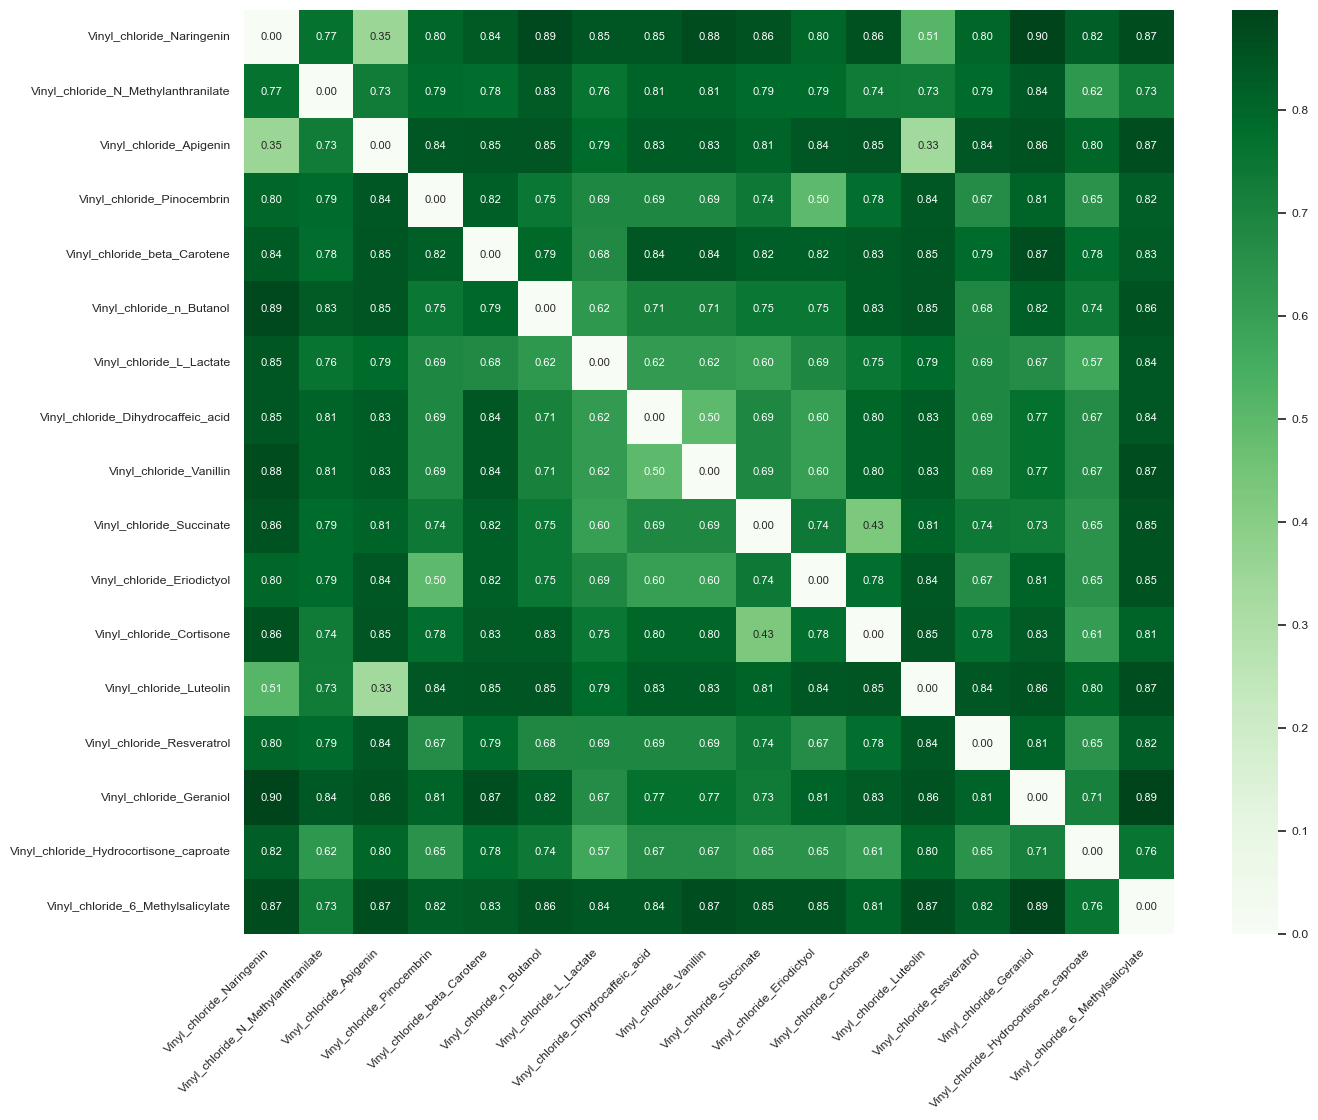

In [25]:
heatmap_vinyl_chloride = dist_heatmap(dist_vinyl_chloride, vinyl_chloride_sets)
heatmap_vinyl_chloride

## dendrogram

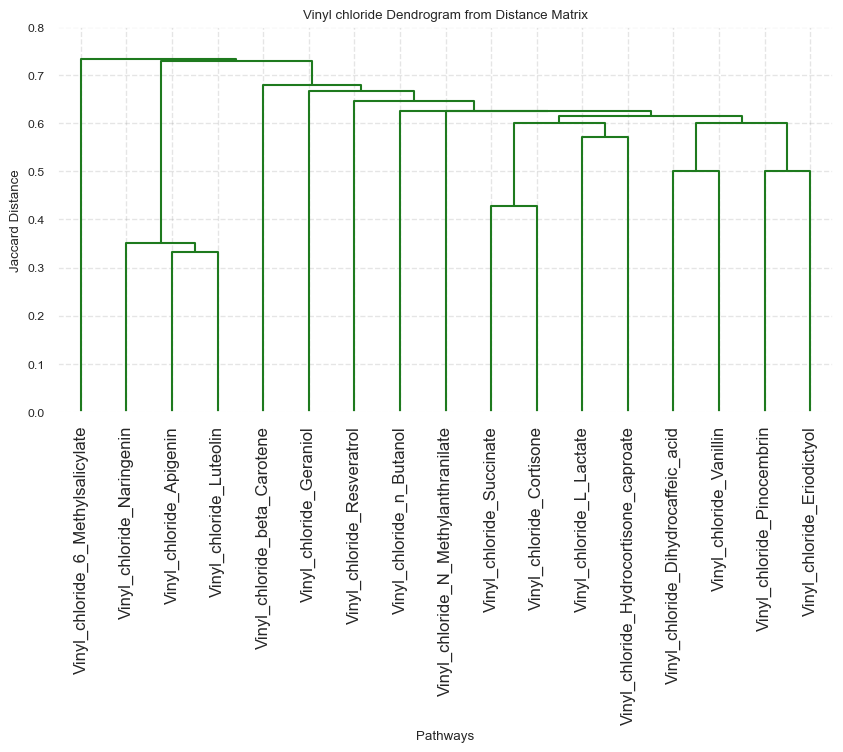

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
from scipy.spatial.distance import squareform

# Get distance matrix 
distance_matrix = dist_vinyl_chloride

# Convert the distance matrix to a condensed format
condensed_distance_matrix = squareform(distance_matrix)

# Perform hierarchical clustering on the condensed distance matrix
linked = linkage(condensed_distance_matrix, method='single')

# Set green color palette for dendrogram
set_link_color_palette(['#006400'])

# Create a dendrogram from the hierarchical clustering result
plt.figure(figsize=(10, 5))
dendrogram(linked, labels=[i for i in vinyl_chloride_sets], orientation='top', link_color_func=lambda k: '#1e7a1e')

# Set axis labels and title
plt.xlabel('Pathways')
plt.ylabel('Jaccard Distance')
plt.title('Vinyl chloride Dendrogram from Distance Matrix')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set custom y-ticks
plt.yticks(np.arange(0, 0.9, 0.1))

plt.gca().set_facecolor('#ffffff')

# Add a grid
plt.grid(True, linestyle='--', color = 'gray', alpha=0.2)

plt.show()

# Ethylene

In [28]:
# Get sets
ethylene_sets = jd_plastic_sets(data, 'Ethylene')

# Get dictionary containing jaccard distances
ethylene_dict = jd_plastic_target(ethylene_sets)

## distance matrix and heatmap

[[0.         0.72       0.90909091 0.93939394 0.92307692 0.925
  0.72413793 0.87096774 0.70588235 0.91428571 0.93548387 0.87878788
  0.87096774 0.94230769 0.90625    0.925      0.65       0.94444444
  0.70588235]
 [0.72       0.         0.92307692 0.94871795 0.90909091 0.91111111
  0.8974359  0.92105263 0.71794872 0.87179487 0.94594595 0.77142857
  0.94871795 0.91071429 0.92105263 0.93478261 0.28571429 0.95238095
  0.57142857]
 [0.90909091 0.92307692 0.         0.81818182 0.88888889 0.83333333
  0.75       0.81818182 0.9        0.76923077 0.77777778 0.75
  0.81818182 0.82142857 0.55555556 0.76470588 0.89655172 0.85714286
  0.9       ]
 [0.93939394 0.94871795 0.81818182 0.         0.88235294 0.88888889
  0.83333333 0.8        0.89473684 0.84615385 0.75       0.83333333
  0.8        0.93333333 0.8        0.57142857 0.93103448 0.84615385
  0.89473684]
 [0.92307692 0.90909091 0.88888889 0.88235294 0.         0.92
  0.89473684 0.88235294 0.83333333 0.9        0.86666667 0.89473684
  0.88235

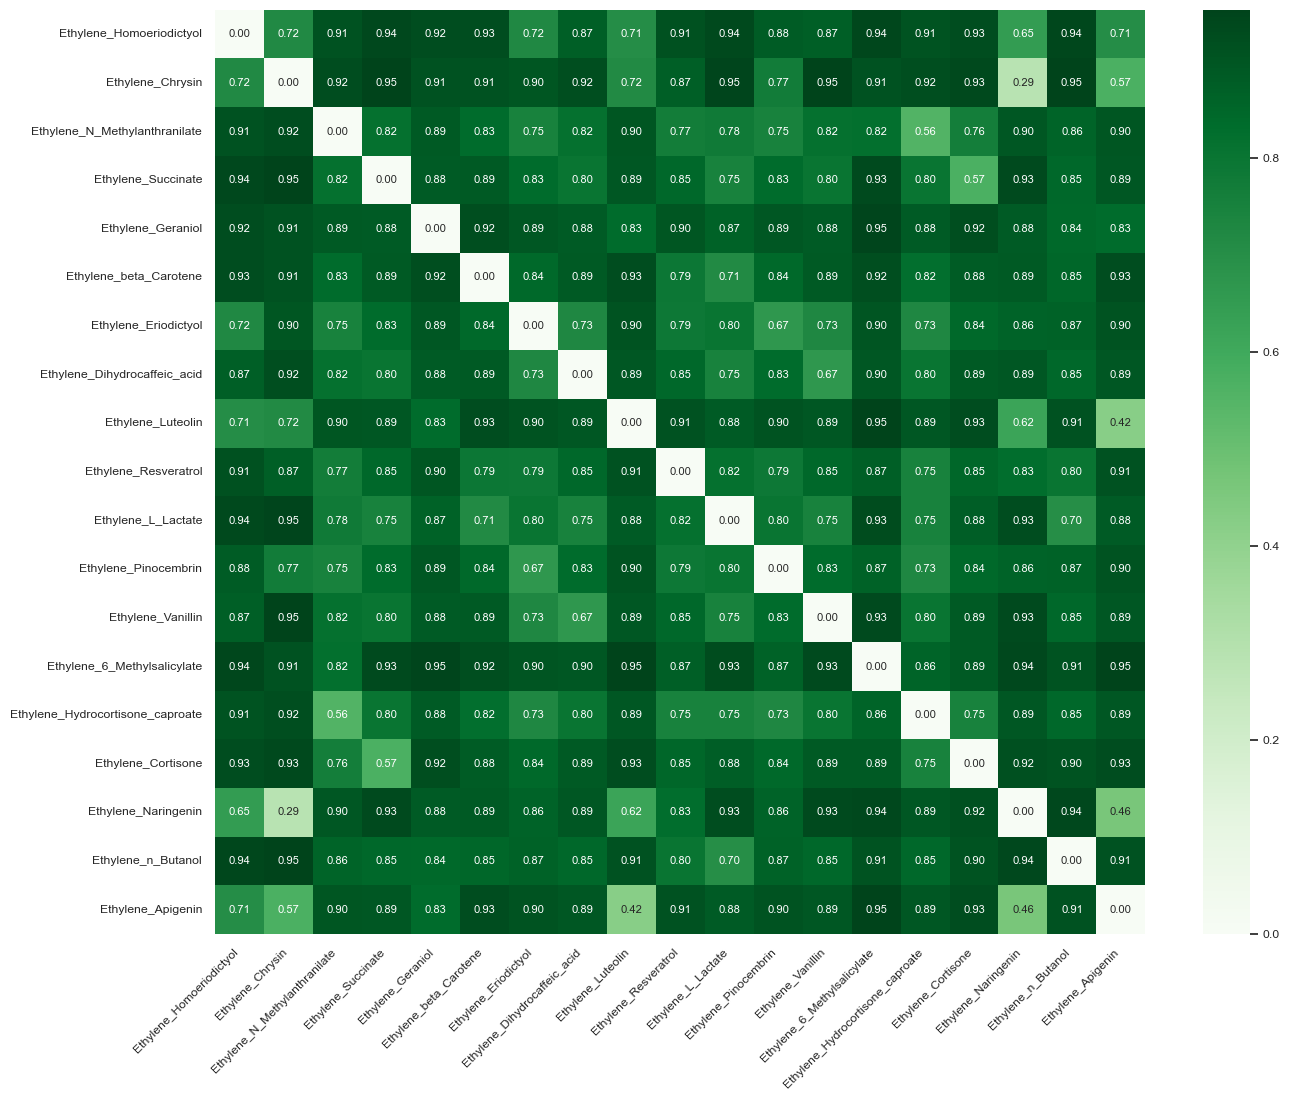

In [29]:
dist_ethylene = dist_matrix(ethylene_sets)
print(dist_ethylene)

heatmap_ethylene = dist_heatmap(dist_ethylene, ethylene_sets)
heatmap_ethylene

## dendrogram

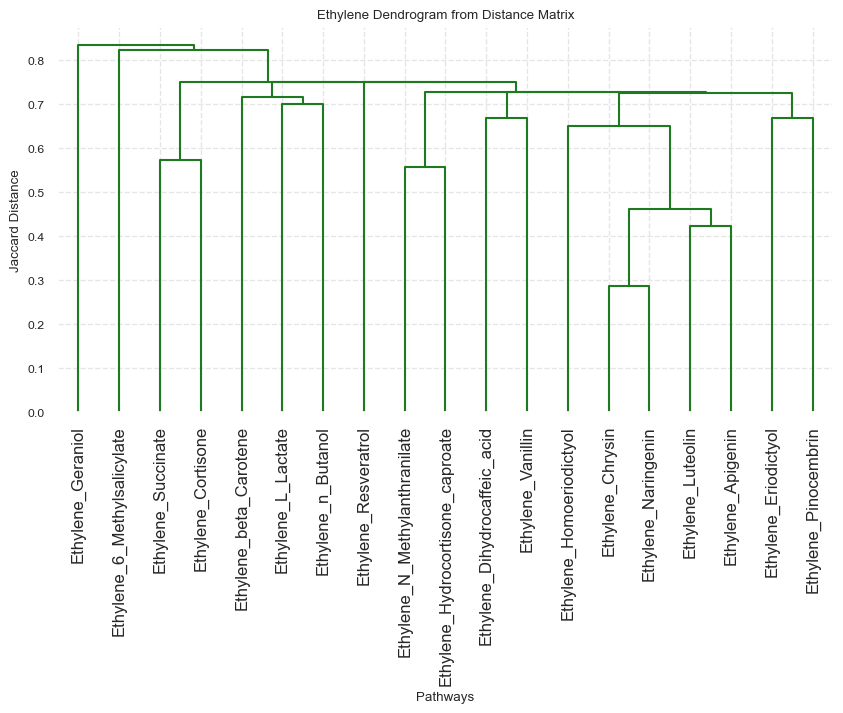

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
from scipy.spatial.distance import squareform

# Create a distance matrix (example matrix, replace with your own)
distance_matrix = dist_ethylene

# Convert the distance matrix to a condensed format
condensed_distance_matrix = squareform(distance_matrix)

# Perform hierarchical clustering on the condensed distance matrix
linked = linkage(condensed_distance_matrix, method='single')

# Set green color palette for dendrogram
set_link_color_palette(['#006400'])

# Create a dendrogram from the hierarchical clustering result
plt.figure(figsize=(10, 5))
dendrogram(linked, labels=[i for i in ethylene_sets], orientation='top', link_color_func=lambda k: '#1e7a1e')

# Set axis labels and title
plt.xlabel('Pathways')
plt.ylabel('Jaccard Distance')
plt.title('Ethylene Dendrogram from Distance Matrix')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set custom y-ticks
plt.yticks(np.arange(0, 0.9, 0.1))

plt.gca().set_facecolor('#ffffff')

# Add a grid
plt.grid(True, linestyle='--', color = 'gray', alpha=0.2)

plt.show()

# Styrene

In [31]:
# Get sets
styrene_sets = jd_plastic_sets(data, 'Styrene')

# Get dictionary containing jaccard distances
styrene_dict = jd_plastic_target(styrene_sets)

## dist matrix and heatmap

[[0.         0.88       0.77777778 0.63636364 0.875      0.90909091
  0.92592593 0.9047619  0.88888889 0.95454545 0.81818182 0.84615385
  0.9375     0.9        0.92857143 0.89473684 0.8        0.77777778
  0.83333333]
 [0.88       0.         0.92       0.89285714 0.95833333 0.96296296
  0.92857143 0.5        0.91666667 0.94594595 0.88461538 0.93103448
  0.54347826 0.96153846 0.96666667 0.91176471 0.78571429 0.77272727
  0.88888889]
 [0.77777778 0.92       0.         0.83333333 0.85714286 0.9
  0.92307692 0.9        0.875      0.95238095 0.8        0.83333333
  0.95833333 0.88888889 0.92307692 0.88888889 0.86666667 0.88888889
  0.81818182]
 [0.63636364 0.89285714 0.83333333 0.         0.90909091 0.92857143
  0.93333333 0.91666667 0.91666667 0.96       0.85714286 0.875
  0.94117647 0.92307692 0.94117647 0.90909091 0.83333333 0.83333333
  0.86666667]
 [0.875      0.95833333 0.85714286 0.90909091 0.         0.875
  0.96       0.94736842 0.83333333 0.88888889 0.88888889 0.8
  0.95652174 0.8

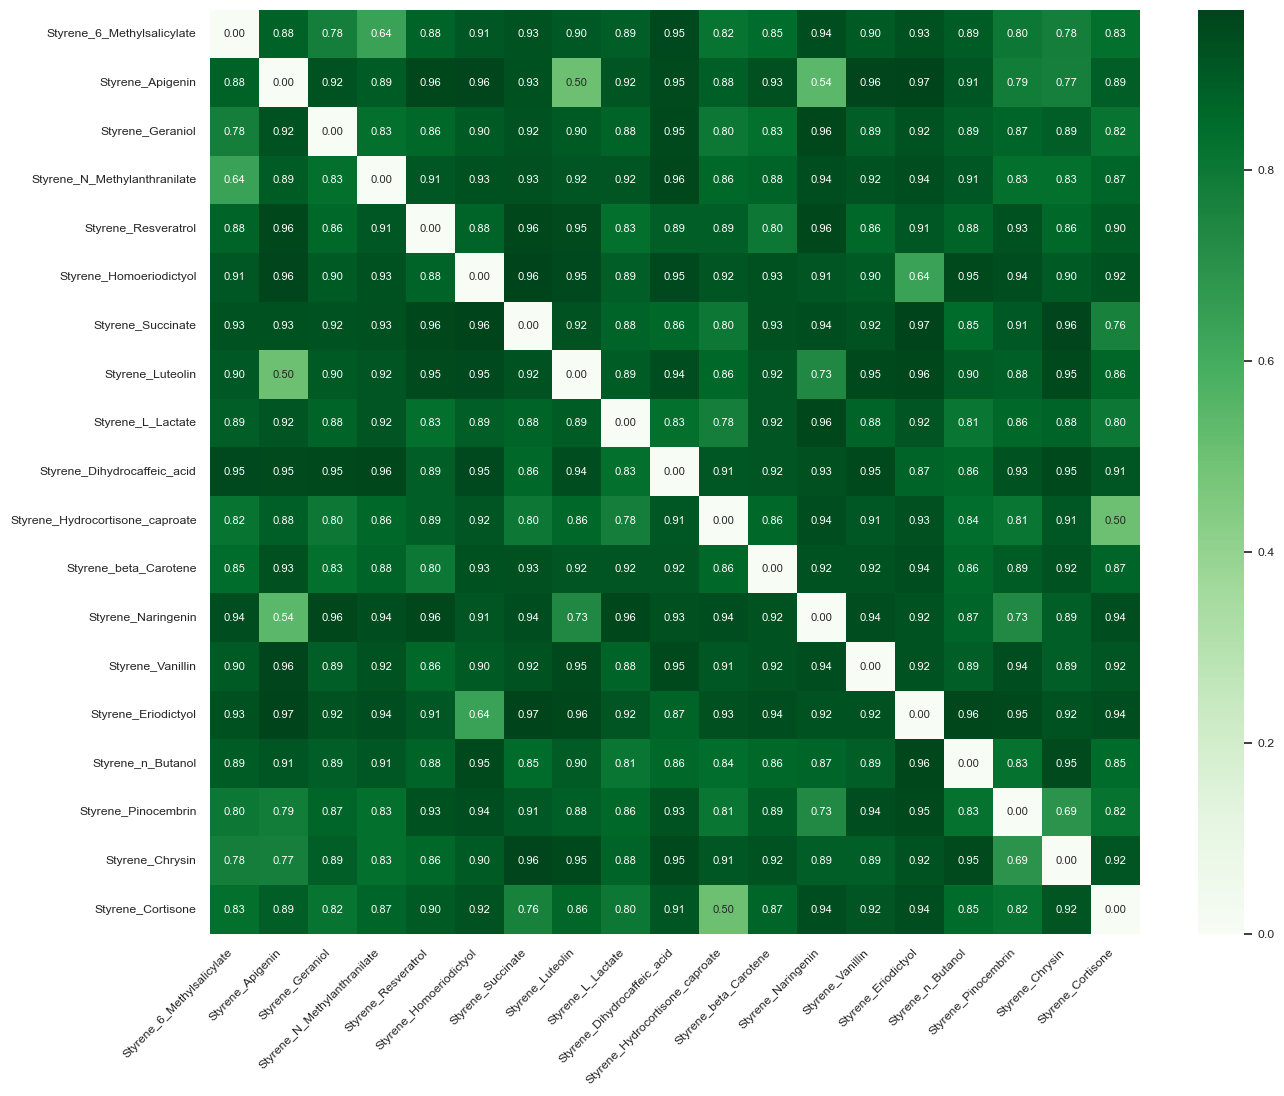

In [32]:
dist_styrene = dist_matrix(styrene_sets)
print(dist_styrene)

heatmap_styrene = dist_heatmap(dist_styrene, styrene_sets)
heatmap_styrene

## dendrogram

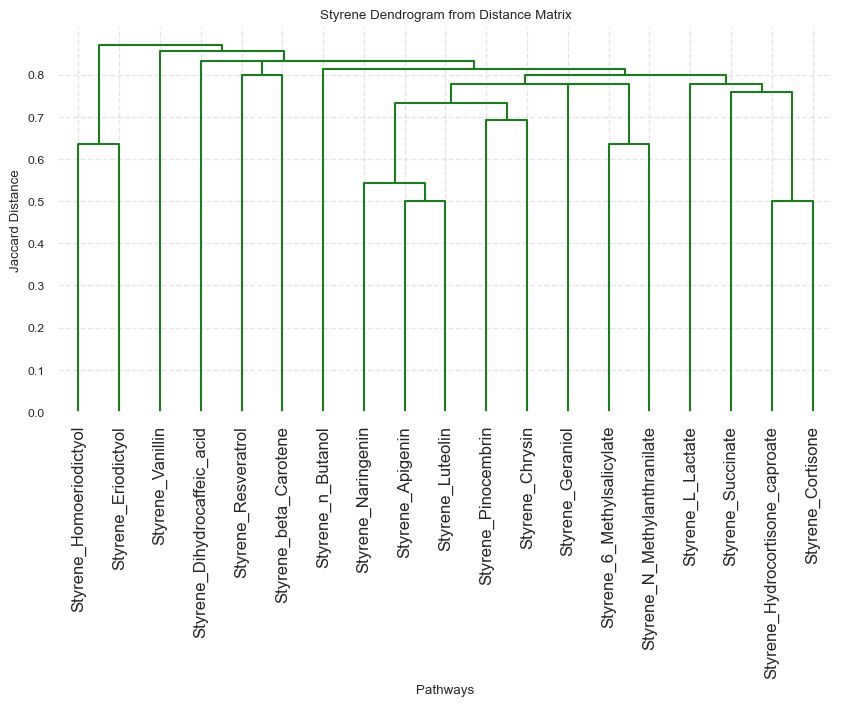

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
from scipy.spatial.distance import squareform

# Create a distance matrix (example matrix, replace with your own)
distance_matrix = dist_styrene

# Convert the distance matrix to a condensed format
condensed_distance_matrix = squareform(distance_matrix)

# Perform hierarchical clustering on the condensed distance matrix
linked = linkage(condensed_distance_matrix, method='single')

# Set green color palette for dendrogram
set_link_color_palette(['#006400'])

# Create a dendrogram from the hierarchical clustering result
plt.figure(figsize=(10, 5))
dendrogram(linked, labels=[i for i in styrene_sets], orientation='top', link_color_func=lambda k: '#1e7a1e')

# Set axis labels and title
plt.xlabel('Pathways')
plt.ylabel('Jaccard Distance')
plt.title('Styrene Dendrogram from Distance Matrix')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set custom y-ticks
plt.yticks(np.arange(0, 0.9, 0.1))

plt.gca().set_facecolor('#ffffff')

# Add a grid
plt.grid(True, linestyle='--', color = 'gray', alpha=0.2)

plt.show()

# Terephthalate

In [34]:
# Get sets
terephthalate_sets = jd_plastic_sets(data, 'Terephthalate')

# Get dictionary containing jaccard distances
terephthalate_dict = jd_plastic_target(terephthalate_sets)

## dist matrix and hetamap

[[0.         0.85714286 0.93333333 0.53846154 0.6        0.83333333
  0.875      0.93333333 0.77777778 0.9375     0.69230769 0.875
  0.96       0.93333333 0.94736842 0.93333333 0.87878788 0.94444444
  0.86666667 0.96      ]
 [0.85714286 0.         0.92307692 0.81818182 0.84615385 0.84615385
  0.8        0.88888889 0.85714286 0.92307692 0.77777778 0.8
  0.94736842 0.88888889 0.92307692 0.96428571 0.93103448 0.91666667
  0.625      0.94736842]
 [0.93333333 0.92307692 0.         0.95348837 0.95555556 0.72972973
  0.95238095 0.95       0.93333333 0.37837838 0.95121951 0.87179487
  0.59459459 0.95       0.93023256 0.63636364 0.74       0.92857143
  0.925      0.73170732]
 [0.53846154 0.81818182 0.95348837 0.         0.5        0.875
  0.84615385 0.91666667 0.73333333 0.93103448 0.6        0.84615385
  0.95454545 0.91666667 0.9375     0.94827586 0.90322581 0.93333333
  0.83333333 0.95454545]
 [0.6        0.84615385 0.95555556 0.5        0.         0.88888889
  0.86666667 0.92857143 0.7647058

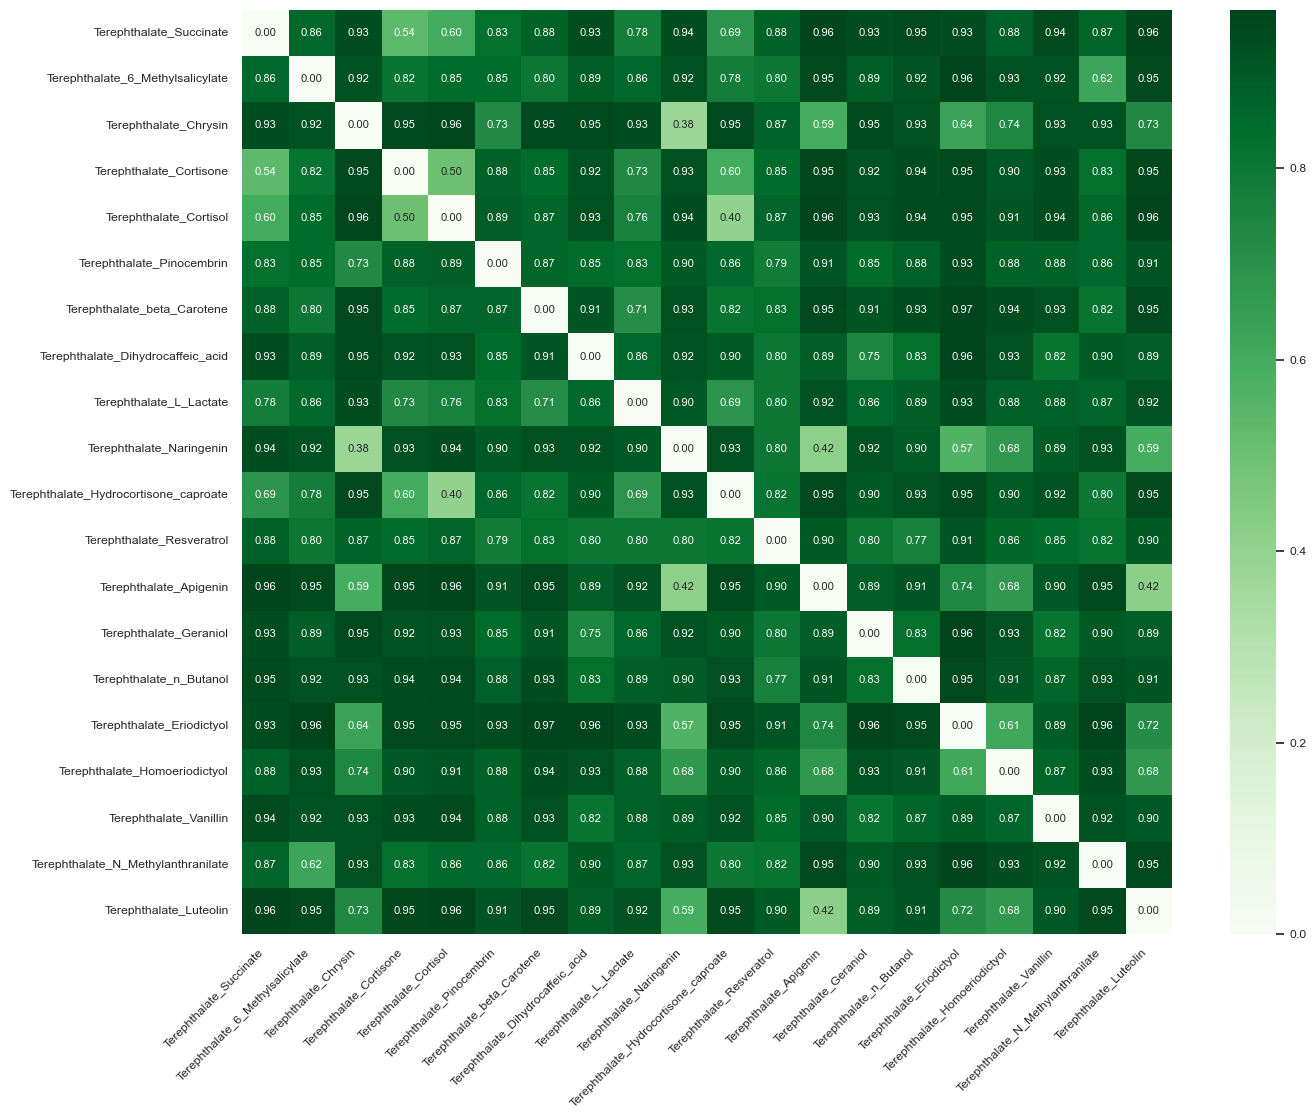

In [35]:
dist_terephthalate = dist_matrix(terephthalate_sets)
print(dist_terephthalate)

heatmap_terephthalate = dist_heatmap(dist_terephthalate, terephthalate_sets)
heatmap_terephthalate

## dendrogram

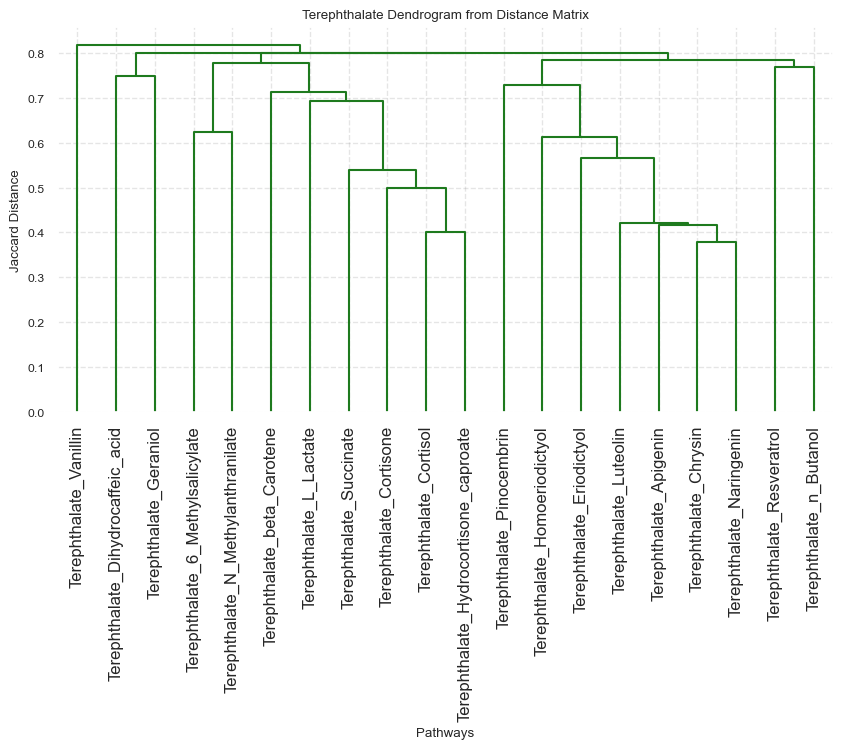

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
from scipy.spatial.distance import squareform

# get distance matrix 
distance_matrix = dist_terephthalate

# Convert the distance matrix to a condensed format
condensed_distance_matrix = squareform(distance_matrix)

# Perform hierarchical clustering on the condensed distance matrix
linked = linkage(condensed_distance_matrix, method='single')

# Set green color palette for dendrogram
set_link_color_palette(['#006400'])

# Create a dendrogram from the hierarchical clustering result
plt.figure(figsize=(10, 5))
dendrogram(linked, labels=[i for i in terephthalate_sets], orientation='top', link_color_func=lambda k: '#1e7a1e')

# Set axis labels and title
plt.xlabel('Pathways')
plt.ylabel('Jaccard Distance')
plt.title('Terephthalate Dendrogram from Distance Matrix')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set custom y-ticks
plt.yticks(np.arange(0, 0.9, 0.1))

plt.gca().set_facecolor('#ffffff')

# Add a grid
plt.grid(True, linestyle='--', color = 'gray', alpha=0.2)

plt.show()

# combine graphs

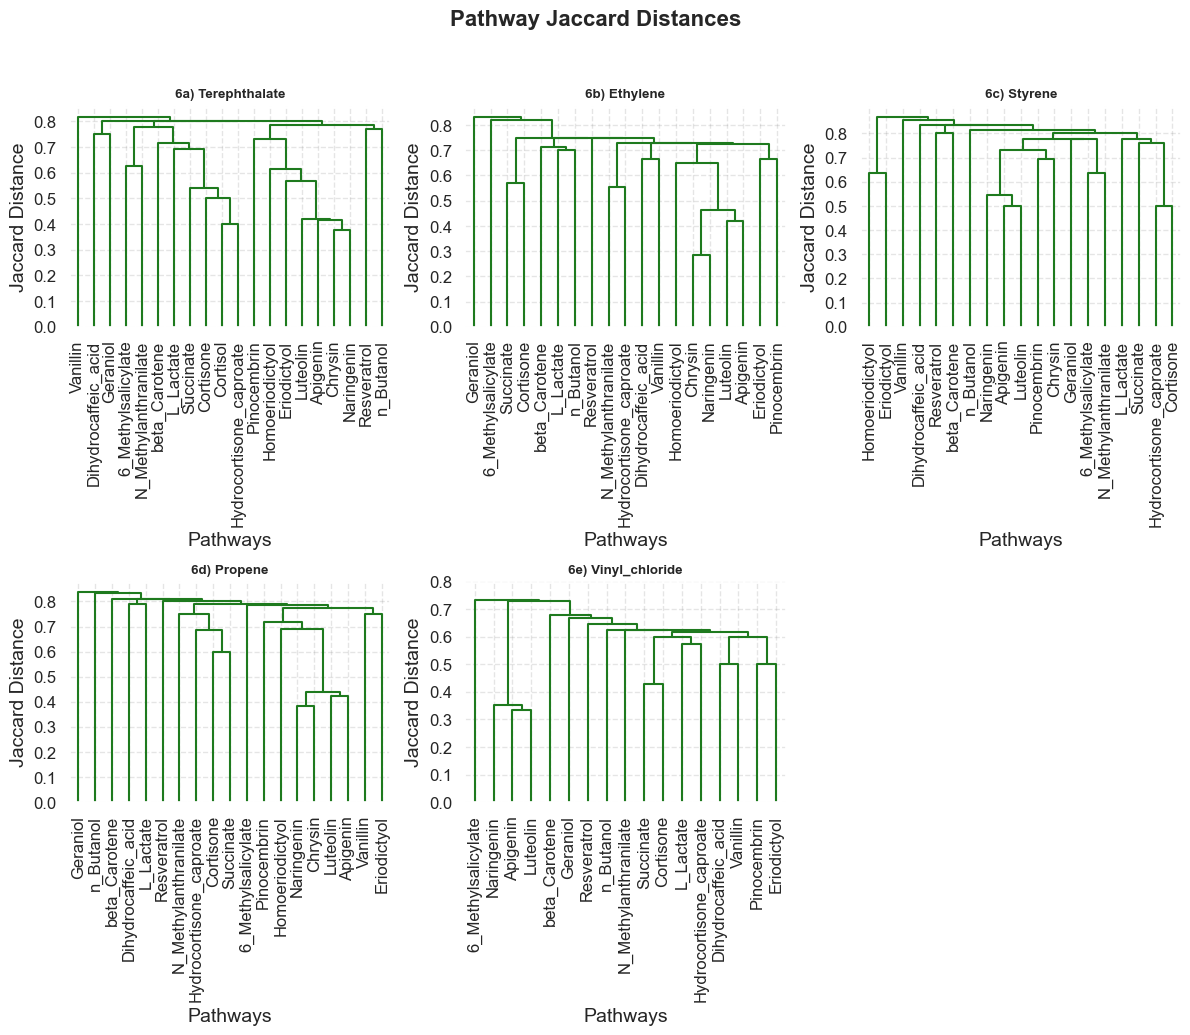

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
from scipy.spatial.distance import squareform

# add 5 distance matrices to a list
distance_matrices = [dist_terephthalate, dist_ethylene, dist_styrene, dist_propene, dist_vinyl_chloride]

# add 5 sets to a list 
all_sets = [terephthalate_sets, ethylene_sets, styrene_sets, propene_sets, vinyl_chloride_sets]

# Create a list of dataset names
dataset_names = ['Terephthalate', 'Ethylene', 'Styrene', 'Propene', 'Vinyl Chloride']

# Set green color palette for dendrogram
set_link_color_palette(['#006400'])

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axes = axes.ravel()  # Flatten the axes array for easier indexing

# Iterate through distance matrices, sets and dataset names
for i, (dist_matrix, dataset_sets, name) in enumerate(zip(distance_matrices, all_sets, dataset_names)):
    # Convert the distance matrix to a condensed format
    condensed_distance_matrix = squareform(dist_matrix)

    # Perform hierarchical clustering on the condensed distance matrix
    linked = linkage(condensed_distance_matrix, method='single')

    # Change the name for Vinyl Chloride to Vinyl_chloride
    name = 'Vinyl_chloride' if name == 'Vinyl Chloride' else name

    # Create a dendrogram from the hierarchical clustering result
    dendrogram(linked, labels=[i.replace(f'{name}_', '') for i in dataset_sets], orientation='top', link_color_func=lambda k: '#1e7a1e', ax=axes[i])

    # Set axis labels and title with increased font size
    axes[i].set_xlabel('Pathways', fontsize=14)
    axes[i].set_ylabel('Jaccard Distance', fontsize=14)
    axes[i].set_title(name, fontsize=16)  # Set the title as the capitalized dataset name

     # Set the subplot title
    axes[i].set_title(f'6{chr(97+i)}) {name}', fontweight='bold') 

    # Rotate x-axis labels and increase their font size
    plt.setp(axes[i].get_xticklabels(), rotation=90, fontsize=12)

    # Set custom y-ticks and increase their font size
    axes[i].set_yticks(np.arange(0, 0.9, 0.1))
    axes[i].tick_params(axis='y', labelsize=12)

    # Set background color
    axes[i].set_facecolor('#ffffff')

    # Add a grid
    axes[i].grid(True, linestyle='--', color='gray', alpha=0.2)
    
plt.suptitle('Pathway Jaccard Distances', fontsize=16, y=1.03, fontweight='bold')

# Remove the unused last subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()